In [17]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
#read the csv file
stocks = pd.read_csv("data/Final_Collective_Dataset.csv")
stocks.head()

,Date,UAL_Close,UAL_Volume,UAL_Open,UAL_High,UAL_Low,DAL_Close,DAL_Volume,DAL_Open,DAL_High,...,LUV_High,LUV_Low,SAVE_Close,SAVE_Volume,SAVE_Open,SAVE_High,SAVE_Low,Year,Month,Day
0,2020-12-31,43.25,12683980.0,44.410,44.5617,43.11,40.21,8705736.0,40.30,40.7400,...,46.78,45.680,24.45,3548551.0,24.70,24.8914,24.2100,2020,12,31
1,2020-12-30,44.65,9473270.0,43.635,44.7600,43.46,40.56,8504632.0,40.00,40.9050,...,46.93,46.125,24.87,3427572.0,24.62,25.3400,24.5600,2020,12,30
2,2020-12-29,43.74,9927674.0,44.450,44.6489,43.55,40.03,8142801.0,40.84,40.8400,...,46.77,45.970,24.68,3917613.0,25.42,25.5700,24.5200,2020,12,29
3,2020-12-28,43.92,13693200.0,44.035,44.6250,43.75,40.15,10654380.0,40.27,40.7758,...,47.17,46.110,25.07,4295602.0,24.96,25.4700,24.6202,2020,12,28
4,2020-12-24,43.26,7230607.0,44.400,44.4165,43.01,39.73,5176408.0,40.42,40.4400,...,47.09,45.810,24.42,2618194.0,24.79,24.8300,24.0540,2020,12,24


In [19]:
#determine the shape of the data
print("training days =", stocks.shape)

training days = (756, 34)


# United Airlines

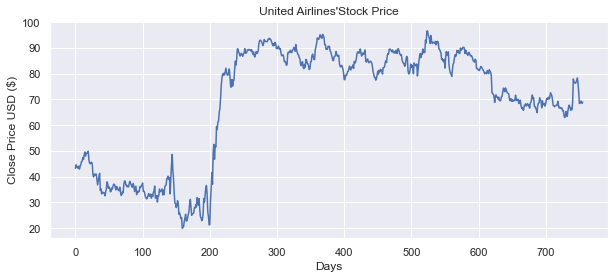

<Figure size 432x288 with 0 Axes>

In [20]:
#creating initial plot of United Airlines Closing prices as of Dec 31, 2020
sns.set()
plt.figure(figsize=(10, 4))

#create labels
plt.title("United Airlines'Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(stocks["UAL_Close"])

#display chart
plt.show()

#save to png
plt.savefig("images/originalcloseUAL.png")

In [21]:
#pulling the array of close prices
close = stocks[["UAL_Close"]]
close.head()

,UAL_Close
0,43.25
1,44.65
2,43.74
3,43.92
4,43.26


In [22]:
#creating a variable for the number of future days predicted
futureDays = 65

In [23]:
#creating a new column to hold the predicted values of close prices
close["Prediction"] = stocks[["UAL_Close"]].shift(-futureDays)
print(close.head())
print(close.tail())

   UAL_Close  Prediction
0      43.25       34.51
1      44.65       35.94
2      43.74       34.20
3      43.92       32.74
4      43.26       33.08
     UAL_Close  Prediction
751      68.51         NaN
752      69.36         NaN
753      69.26         NaN
754      68.49         NaN
755      68.94         NaN


<ipython-input-23-54dc9c3dd306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close["Prediction"] = stocks[["UAL_Close"]].shift(-futureDays)


In [24]:
#creating an array and removing the last rows
X = np.array(close.drop(["Prediction"], 1))[:-futureDays]
print(X)

[[43.25 ]
 [44.65 ]
 [43.74 ]
 [43.92 ]
 [43.26 ]
 [44.11 ]
 [42.97 ]
 [44.055]
 [44.74 ]
 [45.88 ]
 [46.   ]
 [47.46 ]
 [46.72 ]
 [48.36 ]
 [49.64 ]
 [48.02 ]
 [49.04 ]
 [49.2  ]
 [49.24 ]
 [49.91 ]
 [46.73 ]
 [45.32 ]
 [45.05 ]
 [45.3  ]
 [45.64 ]
 [44.96 ]
 [40.93 ]
 [39.9  ]
 [40.94 ]
 [41.05 ]
 [40.6  ]
 [41.   ]
 [38.99 ]
 [36.85 ]
 [38.51 ]
 [40.05 ]
 [41.32 ]
 [34.68 ]
 [35.35 ]
 [33.34 ]
 [34.02 ]
 [33.78 ]
 [33.86 ]
 [33.57 ]
 [32.6  ]
 [34.17 ]
 [35.34 ]
 [38.01 ]
 [37.24 ]
 [35.54 ]
 [36.06 ]
 [35.5  ]
 [34.16 ]
 [34.25 ]
 [35.61 ]
 [35.26 ]
 [36.38 ]
 [37.12 ]
 [37.   ]
 [36.38 ]
 [34.88 ]
 [36.2  ]
 [36.01 ]
 [35.18 ]
 [34.75 ]
 [34.51 ]
 [35.94 ]
 [34.2  ]
 [32.74 ]
 [33.08 ]
 [34.07 ]
 [33.79 ]
 [36.97 ]
 [38.355]
 [38.3  ]
 [36.8  ]
 [36.74 ]
 [36.07 ]
 [36.45 ]
 [36.03 ]
 [37.28 ]
 [38.21 ]
 [37.4  ]
 [36.89 ]
 [36.01 ]
 [36.   ]
 [37.34 ]
 [36.22 ]
 [34.25 ]
 [35.22 ]
 [36.32 ]
 [33.04 ]
 [34.05 ]
 [34.44 ]
 [33.98 ]
 [34.4  ]
 [36.18 ]
 [35.81 ]
 [36.4  ]
 [36.83 ]


In [25]:
#creating an array for the target dataset and removing the last rows
y = np.array(close["Prediction"])[:-futureDays]
print(y)

[34.51  35.94  34.2   32.74  33.08  34.07  33.79  36.97  38.355 38.3
 36.8   36.74  36.07  36.45  36.03  37.28  38.21  37.4   36.89  36.01
 36.    37.34  36.22  34.25  35.22  36.32  33.04  34.05  34.44  33.98
 34.4   36.18  35.81  36.4   36.83  37.54  34.33  34.4   33.73  32.29
 31.87  31.38  31.74  32.57  33.46  32.42  32.88  33.23  31.67  33.07
 32.33  33.92  34.49  36.37  31.74  31.76  32.67  30.17  32.53  32.55
 35.21  34.14  34.45  34.61  35.27  32.89  34.69  33.07  36.08  36.54
 36.84  39.34  39.25  40.21  39.    39.66  33.32  39.72  44.64  48.69
 42.405 39.1   33.65  29.91  29.46  28.04  28.89  30.69  29.54  25.4
 25.84  24.91  23.68  24.13  19.92  20.3   20.71  22.76  23.97  25.42
 22.75  22.91  24.12  25.26  26.62  29.58  31.21  27.84  25.    25.56
 25.72  25.88  27.88  27.79  29.08  28.21  31.86  30.9   28.91  31.5
 27.51  24.48  24.02  22.885 23.42  25.65  31.55  30.16  32.84  35.55
 36.6   33.    26.25  24.5   21.28  21.38  30.67  35.47  41.64  37.08
 49.34  52.56  46.78  5

In [26]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
#creating a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [28]:
#creating a Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)

In [29]:
#pulling the last rows of the predictive dataset
futureX = close.drop(["Prediction"], 1)[:-futureDays]
futureX = futureX.tail(futureDays)
futureX = np.array(futureX)
print(futureX)

[[71.79]
 [70.96]
 [70.92]
 [70.16]
 [70.92]
 [69.73]
 [69.44]
 [69.57]
 [71.02]
 [71.33]
 [72.94]
 [74.42]
 [74.07]
 [73.  ]
 [74.49]
 [73.89]
 [73.02]
 [72.5 ]
 [72.39]
 [72.15]
 [69.99]
 [69.54]
 [70.36]
 [69.32]
 [69.98]
 [69.25]
 [69.59]
 [69.8 ]
 [69.52]
 [71.68]
 [70.47]
 [69.54]
 [69.99]
 [70.07]
 [68.42]
 [69.49]
 [69.74]
 [68.03]
 [66.64]
 [66.92]
 [66.02]
 [65.8 ]
 [67.72]
 [67.52]
 [68.32]
 [67.52]
 [67.92]
 [68.38]
 [67.54]
 [67.86]
 [66.62]
 [68.51]
 [68.95]
 [70.33]
 [71.75]
 [70.23]
 [70.58]
 [67.34]
 [67.31]
 [66.54]
 [66.1 ]
 [64.87]
 [67.59]
 [68.52]
 [68.63]]


In [30]:
#predicting using the decision tree model
treePrediction = tree.predict(futureX)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [70.69  69.99  69.19  66.77  69.19  67.86  68.18  68.48  67.39  68.45
 70.88  70.13  70.13  70.88  70.13  70.74  72.6   72.    72.    69.87
 66.52  67.055 67.21  67.79  66.52  67.79  67.86  66.52  67.57  66.7
 93.29  67.055 66.52  66.74  65.68  65.7   67.86  62.98  63.37  65.36
 63.95  63.4   69.26  67.08  67.82  67.08  69.05  65.68  66.08  69.05
 77.97  76.87  76.5   76.3   76.58  77.49  78.4   73.08  73.08  68.48
 68.51  90.97  69.26  76.87  68.94 ]


In [31]:
#predicting using the linear regression model
linearPrediction = linear.predict(futureX)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [73.50225977 72.98723355 72.96241301 72.49082274 72.96241301 72.22400193
 72.04405301 72.12471977 73.02446437 73.21682356 74.21585032 75.13421032
 74.91703059 74.25308113 75.17764627 74.80533816 74.2654914  73.94282437
 73.87456788 73.72564464 72.38533544 72.10610436 72.61492545 71.96959139
 72.37913031 71.92615544 72.13713004 72.26743788 72.09369409 73.43400329
 72.68318193 72.10610436 72.38533544 72.43497653 71.41112922 72.07507869
 72.23020707 71.16912895 70.30661516 70.48035895 69.92189678 69.78538381
 70.97676976 70.85266706 71.34907787 70.85266706 71.10087247 71.38630868
 70.86507733 71.06364165 70.29420489 71.46697544 71.74000139 72.59631004
 73.47743923 72.53425869 72.75143842 70.74097463 70.72235922 70.24456381
 69.97153787 69.20830624 70.896103   71.47318058 71.54143706]


<ipython-input-32-53616ca705d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


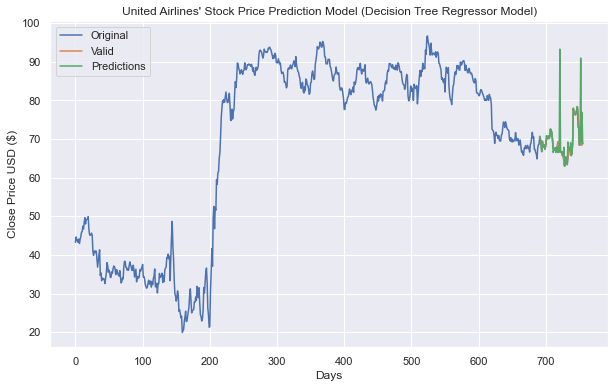

<Figure size 432x288 with 0 Axes>

In [32]:
#plotting the decision tree model predictions
predictions = treePrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("United Airlines' Stock Price Prediction Model (Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["UAL_Close"])
plt.plot(valid[["UAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display the chart
plt.show()

#save to png
plt.savefig("images/decisiontreeUAL.png")

<ipython-input-33-fd9bed476c44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


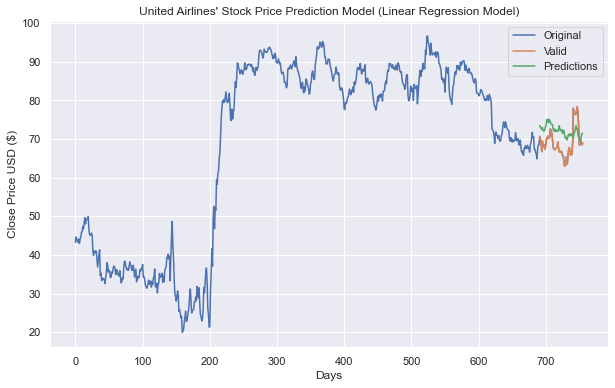

<Figure size 432x288 with 0 Axes>

In [33]:
#plotting the linear regression model predictions
predictions = linearPrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("United Airlines' Stock Price Prediction Model (Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["UAL_Close"])
plt.plot(valid[["UAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display chart
plt.show()

#save to png
plt.savefig("images/linearregressionUAL.png")

# Delta Airlines

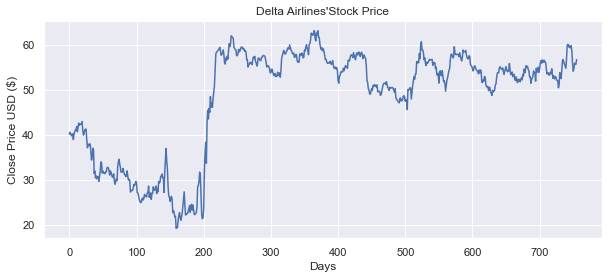

<Figure size 432x288 with 0 Axes>

In [34]:
#creating initial plot of United Airlines Closing prices as of Dec 31, 2020
sns.set()
plt.figure(figsize=(10, 4))

#create labels
plt.title("Delta Airlines'Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(stocks["DAL_Close"])

#display chart
plt.show()

#save to png
plt.savefig("images/originalcloseDAL.png")

In [35]:
#pulling the array of close prices
close = stocks[["DAL_Close"]]
close.head()

,DAL_Close
0,40.21
1,40.56
2,40.03
3,40.15
4,39.73


In [36]:
#creating a variable for the number of future days predicted
futureDays = 65

In [37]:
#creating a new column to hold the predicted values of close prices
close["Prediction"] = stocks[["DAL_Close"]].shift(-futureDays)
print(close.head())
print(close.tail())

   DAL_Close  Prediction
0      40.21       30.61
1      40.56       31.34
2      40.03       29.78
3      40.15       29.01
4      39.73       29.56
     DAL_Close  Prediction
751      54.68         NaN
752      55.97         NaN
753      55.69         NaN
754      55.69         NaN
755      56.74         NaN


<ipython-input-37-1194da2c7ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close["Prediction"] = stocks[["DAL_Close"]].shift(-futureDays)


In [38]:
#creating an array and removing the last rows
X = np.array(close.drop(["Prediction"], 1))[:-futureDays]
print(X)

[[40.21]
 [40.56]
 [40.03]
 [40.15]
 [39.73]
 [40.24]
 [38.94]
 [40.14]
 [40.68]
 [41.11]
 [41.08]
 [41.85]
 [40.69]
 [41.74]
 [42.62]
 [42.11]
 [42.41]
 [42.35]
 [42.36]
 [42.95]
 [41.07]
 [39.96]
 [40.25]
 [41.06]
 [41.29]
 [41.26]
 [38.79]
 [37.13]
 [37.91]
 [37.91]
 [37.6 ]
 [38.  ]
 [36.46]
 [34.38]
 [35.02]
 [37.04]
 [36.77]
 [31.42]
 [31.98]
 [30.43]
 [30.9 ]
 [30.22]
 [30.64]
 [30.76]
 [29.65]
 [30.71]
 [31.93]
 [34.  ]
 [33.72]
 [31.5 ]
 [31.98]
 [31.5 ]
 [31.47]
 [31.34]
 [31.76]
 [31.77]
 [32.64]
 [32.81]
 [32.68]
 [32.15]
 [31.06]
 [32.  ]
 [31.75]
 [31.1 ]
 [30.58]
 [30.61]
 [31.34]
 [29.78]
 [29.01]
 [29.56]
 [30.22]
 [29.82]
 [32.84]
 [33.96]
 [34.57]
 [33.51]
 [32.82]
 [31.7 ]
 [31.79]
 [31.76]
 [32.54]
 [31.77]
 [31.22]
 [31.14]
 [30.71]
 [30.85]
 [31.99]
 [30.82]
 [29.95]
 [30.1 ]
 [29.8 ]
 [27.27]
 [27.62]
 [27.67]
 [27.63]
 [28.02]
 [28.95]
 [28.7 ]
 [29.09]
 [29.64]
 [29.34]
 [27.18]
 [27.08]
 [26.47]
 [25.67]
 [25.2 ]
 [24.97]
 [24.94]
 [25.72]
 [25.94]
 [25.5 ]
 

In [39]:
#creating an array for the target dataset and removing the last rows
y = np.array(close["Prediction"])[:-futureDays]
print(y)

[30.61 31.34 29.78 29.01 29.56 30.22 29.82 32.84 33.96 34.57 33.51 32.82
 31.7  31.79 31.76 32.54 31.77 31.22 31.14 30.71 30.85 31.99 30.82 29.95
 30.1  29.8  27.27 27.62 27.67 27.63 28.02 28.95 28.7  29.09 29.64 29.34
 27.18 27.08 26.47 25.67 25.2  24.97 24.94 25.72 25.94 25.5  25.96 26.78
 26.25 26.43 26.22 27.05 27.26 28.6  26.11 26.82 27.09 25.65 27.01 27.01
 28.44 27.72 27.7  28.05 28.61 26.91 28.01 27.34 29.64 29.31 29.51 30.79
 30.72 31.3  30.46 30.43 27.2  31.64 34.17 36.97 34.16 32.38 28.47 26.41
 26.17 25.21 25.66 26.32 25.65 22.69 23.16 22.72 21.76 21.86 19.19 19.38
 19.41 21.03 22.01 22.72 21.68 21.   21.71 22.57 24.12 25.91 27.32 24.34
 22.16 22.41 22.48 22.47 23.1  23.64 24.27 22.78 24.35 24.54 23.25 24.39
 23.23 22.25 22.32 22.48 22.68 23.87 28.53 28.67 29.55 31.7  31.1  26.89
 22.22 21.35 21.51 23.49 31.74 35.81 38.36 33.71 42.67 45.47 43.52 45.89
 45.01 48.5  46.18 47.16 46.13 48.19 49.59 50.89 54.23 57.87 58.38 58.51
 58.72 58.9  59.13 59.47 58.66 57.71 57.92 58.18 58

In [40]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
#creating a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [42]:
#creating a Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)

In [43]:
#pulling the last rows of the predictive dataset
futureX = close.drop(["Prediction"], 1)[:-futureDays]
futureX = futureX.tail(futureDays)
futureX = np.array(futureX)
print(futureX)

[[50.51]
 [49.58]
 [49.26]
 [48.78]
 [49.92]
 [49.54]
 [49.8 ]
 [49.89]
 [51.07]
 [51.31]
 [52.72]
 [53.73]
 [53.84]
 [53.78]
 [54.8 ]
 [55.18]
 [54.9 ]
 [54.65]
 [54.55]
 [54.89]
 [54.09]
 [53.46]
 [54.17]
 [54.67]
 [55.19]
 [54.42]
 [54.05]
 [54.31]
 [54.23]
 [55.87]
 [54.4 ]
 [53.4 ]
 [53.52]
 [53.98]
 [52.95]
 [53.1 ]
 [53.48]
 [52.37]
 [52.09]
 [52.9 ]
 [52.06]
 [51.62]
 [52.37]
 [51.9 ]
 [52.34]
 [51.79]
 [52.36]
 [52.74]
 [52.22]
 [53.5 ]
 [53.13]
 [54.65]
 [53.81]
 [54.61]
 [55.4 ]
 [55.07]
 [55.21]
 [54.55]
 [54.3 ]
 [52.92]
 [52.98]
 [51.47]
 [52.36]
 [52.56]
 [53.05]]


In [44]:
#predicting using the decision tree model
treePrediction = tree.predict(futureX)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [57.41       54.915      53.72       56.71       54.045      53.93
 52.56       55.47       53.9        54.67       55.95       56.5
 55.96       56.69       56.34       56.15       56.59       58.725
 58.52       52.525      53.53       53.84       53.79       58.725
 53.35       53.06333333 53.62       51.825      55.27       52.55
 53.16       53.         57.39       53.38       56.18       55.82
 52.05       52.54       51.23       54.17       53.1        47.96
 52.54       56.42       56.77       56.12       55.725      55.95
 55.07       56.8        56.365      58.725      59.15       60.91
 59.72       54.53       59.83       58.52       53.5        54.17
 54.68       53.135      55.725      55.69       56.74      ]


In [45]:
#predicting using the linear regression model
linearPrediction = linear.predict(futureX)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [51.03414831 50.51244473 50.33293383 50.06366747 50.70317507 50.49000587
 50.63585848 50.68634592 51.34829239 51.48292557 52.27389551 52.84047681
 52.90218368 52.86852539 53.4407164  53.65388561 53.49681356 53.35657067
 53.30047351 53.49120385 53.04242658 52.68901448 53.08730431 53.3677901
 53.65949532 53.2275472  53.01998772 53.16584033 53.1209626  54.040956
 53.21632777 52.65535619 52.72267278 52.98071971 52.40291897 52.48706471
 52.70023391 52.07755545 51.92048341 52.37487039 51.90365426 51.65682677
 52.07755545 51.81389881 52.06072631 51.75219193 52.07194574 52.28511494
 51.99340972 52.71145334 52.50389386 53.35657067 52.88535454 53.3341318
 53.77729936 53.59217873 53.67071475 53.30047351 53.16023061 52.38608983
 52.41974812 51.57268103 52.07194574 52.18414005 52.45901613]


<ipython-input-46-3f55facf09f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


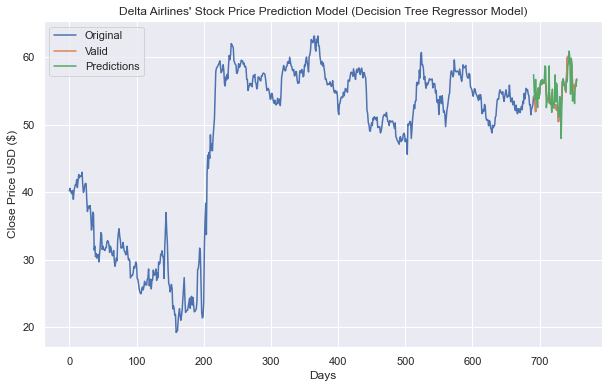

<Figure size 432x288 with 0 Axes>

In [46]:
#plotting the decision tree model predictions
predictions = treePrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("Delta Airlines' Stock Price Prediction Model (Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["DAL_Close"])
plt.plot(valid[["DAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display the chart
plt.show()

#save to png
plt.savefig("images/decisiontreeDAL.png")

<ipython-input-47-0f069b3ae31e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


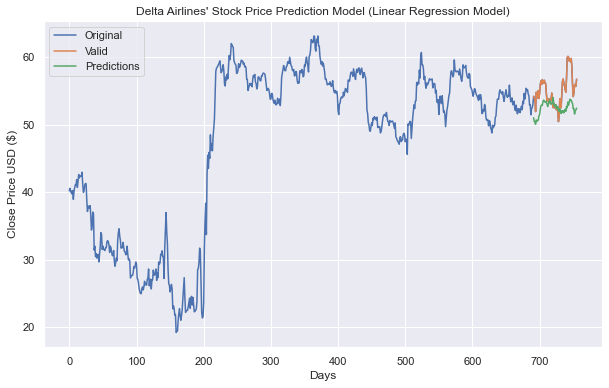

<Figure size 432x288 with 0 Axes>

In [47]:
#plotting the linear regression model predictions
predictions = linearPrediction
valid = close[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))

#create labels
plt.title("Delta Airlines' Stock Price Prediction Model (Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(close["DAL_Close"])
plt.plot(valid[["DAL_Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])

#display chart
plt.show()

#save to png
plt.savefig("images/linearregressionDAL.png")